14.43448806732786 lyr


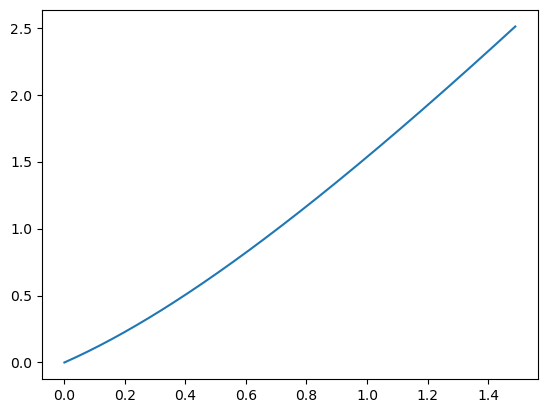

In [1]:
%matplotlib inline
import matplotlib
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit
from scipy.stats import chisquare
from astropy.cosmology import Planck15
from astropy import constants, units
import parameters

DefaultSize=[10,6]
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
axis_font = {'name':'Arial', 'size':'18'}

title_font = {'name':'Arial', 'size':'18'}

def d_planck15(z):
    R0 = (constants.c)/(Planck15.H0)
    d_L = (Planck15.luminosity_distance(z))/R0.to(units.Mpc)
    plt.plot(z, d_L)
    R0=R0.to(units.lyr)/1e9
    return R0,d_L
z = np.arange(0.0,1.5,0.01)
R0_GLY,d_L=d_planck15(z)
R0_GLY_CMB=R0_GLY
print(R0_GLY)
HubbleGRData=pd.DataFrame()
HubbleGRData['z']=z
HubbleGRData['d']=d_L

# http://astronomy.swin.edu.au/cosmos/D/Distance+Modulus


SCPData = pd.ExcelFile(parameters.supernovaAddress + 'SCPUnionData.xls').parse('Sheet2')
angle=math.pi/4
# First let's create a set of lambda-shifts

# Union Compilation Magnitude vs. Redshift Table
# An ASCII table with tab-separated columns: Supernova Name, Redshift, Distance Modulus, and Distance Modulus Error. 
# For Union2.1, there is an additional column for the probability that the supernova 
# was hosted by a low-mass galaxy.

z = SCPData['redshift']


In [2]:
H0=69.69 *units.km/units.s/units.Mpc
H0_saved=H0
R0Diff=R0_GLY-(constants.c/H0).to(units.lyr)
R0_GLY=(constants.c/H0).to(units.lyr)
R0_GLY

<Quantity 1.40305958e+10 lyr>

In [3]:
densityOfUniverse=constants.c**2/(0.776*2*np.pi**2*constants.G*R0_GLY**2).si;densityOfUniverse

<Quantity 4.98933486e-27 kg / m3>

In [4]:
hydrogenmass= constants.m_e+ constants.m_p

In [5]:
densityOfUniverse/hydrogenmass

<Quantity 2.98131873 1 / m3>

In [6]:
0.43*hydrogenmass/(1E-15*units.m)**3

<Quantity 7.19619131e+17 kg / m3>

In [7]:
TotalMassOfHypersphericalUniverse=(densityOfUniverse*2*np.pi**2*R0_GLY**3).si
TotalMassOfHypersphericalUniverse

<Quantity 2.30342855e+53 kg>

In [8]:
# Initial 4D radius of the Universe
densityOfBlackHole =  7.19E-17* units.kg/units.m**3
Initial4DRadius =np.sqrt(  constants.c**2/(0.776*2*np.pi**2*constants.G*densityOfBlackHole).si )


In [9]:
Initial4DRadius.to(units.lyr)

<Quantity 116878.06010451 lyr>

In [10]:
MassOfObservableUniverse= (densityOfUniverse*(4/3*np.pi*R0_GLY**3)).si
MassOfObservableUniverse

<Quantity 4.88802719e+52 kg>